# WEB SCRAPING PROJECT 
#### 99acres Website

###### Step 1 :  Importing the libraries required

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axe
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Getting the url we want to scrape

URL="https://www.99acres.com/search/property/buy/residential-all/hyderabad-all?search_type=QS&refSection=GNB&search_location=NRI&lstAcn=NR_R&lstAcnId=-1&src=CLUSTER&preference=S&selected_tab=1&city=38&res_com=R&property_type=R&isvoicesearch=N&keyword_suggest=Hyderabad%20(All)%3B&fullSelectedSuggestions=Hyderabad%20(All)&strEntityMap=W3sidHlwZSI6ImNpdHkifSx7IjEiOlsiSHlkZXJhYmFkIChBbGwpIiwiQ0lUWV8zOCwgUFJFRkVSRU5DRV9TLCBSRVNDT01fUiJdfV0%3D&texttypedtillsuggestion=hy&refine_results=Y&Refine_Localities=Refine%20Localities&action=%2Fdo%2Fquicksearch%2Fsearch&suggestion=CITY_38%2C%20PREFERENCE_S%2C%20RESCOM_R&searchform=1&price_min=null&price_max=null"

In [3]:
page= requests.get(URL,headers={'User-Agent':'Mozilla/5.0'})

In [4]:
page.status_code

200

In [5]:
pagecontents = page.text
# pagecontents

In [6]:
soup = BeautifulSoup(pagecontents)
# soup

In [7]:
# for x in soup.find_all('table',attrs={'class':'srpTuple__tupleTable'}):
#     print(x.text)

In [8]:
# for x in soup.find_all('td',attrs={'class':'list_header_bold srpTuple__spacer10'}):
#     print(x.text)
# # name    

In [9]:
# for x in soup.find_all('a',attrs={'class':'body_med srpTuple__propertyName'}):
#     print(x.text)
# # make new column Area Using regex r'(?<=*in) *'

In [10]:
# for x in soup.find_all('td',attrs={'id':'srp_tuple_price'}):
#     print(x.text)

In [11]:
# for x in soup.find_all('td',attrs={'id':'srp_tuple_primary_area'}):
#     print(x.text)
# # area in sft,area type

In [12]:
# for x in soup.find_all('td',attrs={'class':'srpTuple__midGrid title_semiBold srpTuple__spacer16'}):
#     print(x.text)
# # extract bathrooms and bedrooms    

###### Step 2 : Extracting Data from the Website 

In [13]:
# creating empty lists to append the extracted data
pname=[]
ptype=[]
psft=[]
pbnb=[]
pprice=[]
pagenum=[]
postdt=[]
for i in range(1,101):   # Extracting data from Page 1-100
    start_time=time.time()    # Noting the start time
    URL = 'https://www.99acres.com/property-in-hyderabad-ffid-page-{}?src=CLUSTER'.format(i)   # Identifying the URL
    page= requests.get(URL,headers={'User-Agent':'Mozilla/5.0'})  # requesting data from URL
    pagecontent = page.text  # extract data from website
#   Beautiful Soup helps you pull particular content from a webpage, remove the HTML markup, and save the information.
    soup = BeautifulSoup(pagecontent)
    
#   Getting the required content from website and storing in variables
    for x in soup.find_all('table',attrs={'class':'srpTuple__tupleTable'}):
        name= x.find('td',attrs={'class':'list_header_bold srpTuple__spacer10'})
        xtype=x.find('a',attrs={'class':'body_med srpTuple__propertyName'})
        cost= x.find('td',attrs={'id':'srp_tuple_price'})
        bnb=x.find('td',attrs={'id':'srp_tuple_bedroom'})
        area=x.find('td',attrs={'id':'srp_tuple_primary_area'})
         
        if name is None:
            pname.append(np.NaN)
        else:
            pname.append(name.text)
        
        if xtype is None:
            ptype.append(np.NaN)
        else:
            ptype.append(xtype.text)
                
        if cost is None:
            pprice.append(np.NaN)
        else:
            pprice.append(cost.text)
            
        if bnb is None:
            pbnb.append(np.NaN)
        else:
            pbnb.append(bnb.text)
        
        if area is None:
            psft.append(np.NaN)
        else:
            psft.append(area.text)
        
        pagenum.append(i)
    print('Page {} completed in {} seconds'.format(i, time.time()-start_time)) 
    #calculating time taken to get data from each page
    
    for x in soup.find_all('div',attrs={'class':'srpTuple__srpDealerInfo'}):
        postdate=x.find('div',attrs={'class':'caption_strong_small'})
        
        if postdate is None:
            postdt.append(np.NaN)
        else:
            postdt.append(postdate.text)

Page 1 completed in 1.0341076850891113 seconds
Page 2 completed in 0.9336071014404297 seconds
Page 3 completed in 1.1055240631103516 seconds
Page 4 completed in 1.0855393409729004 seconds
Page 5 completed in 0.838249683380127 seconds
Page 6 completed in 1.0926566123962402 seconds
Page 7 completed in 1.1121947765350342 seconds
Page 8 completed in 1.0447008609771729 seconds
Page 9 completed in 0.9367187023162842 seconds
Page 10 completed in 1.0392804145812988 seconds
Page 11 completed in 0.8214266300201416 seconds
Page 12 completed in 0.8476467132568359 seconds
Page 13 completed in 0.8957347869873047 seconds
Page 14 completed in 1.0057852268218994 seconds
Page 15 completed in 0.857757568359375 seconds
Page 16 completed in 0.8492083549499512 seconds
Page 17 completed in 1.429802656173706 seconds
Page 18 completed in 1.62233567237854 seconds
Page 19 completed in 1.612478494644165 seconds
Page 20 completed in 1.2938659191131592 seconds
Page 21 completed in 1.9489595890045166 seconds
Page 22

###### Finding the length of each appended list to check if we extracted properly

In [14]:
len(pname)
len(ptype)
len(psft)
len(pbnb)
len(pprice)
len(pagenum)
len(postdt)

2498

2498

2498

2498

2498

2498

2498

###### Step 3: Creating a dataframe 

In [15]:
property_df=pd.DataFrame({'Property_Name':pname,'Property_Type':ptype,'Area_in_Sft':psft,'Price':pprice,'Page_No.':pagenum,'bhk':pbnb,'Posted_On':postdt})

In [16]:
property_df.head(10)

,Property_Name,Property_Type,Area_in_Sft,Price,Page_No.,bhk,Posted_On
0,,Residential land / Plot in Medchal,"1,800 sq.ft. (167 sq.m.) Plot Area","₹ 25,000₹ 14/sq.ft.",1,,"Posted on 19th Jul, 2021 by RERA Registered De..."
1,,Residential land / Plot in Maheshwaram,"1,800 sq.ft. (167 sq.m.) Plot Area","₹ 22 Lac₹ 1,222/sq.ft.",1,,"Posted on 12th Jul, 2021 by RERA Registered De..."
2,Signature Fortius,2 BHK Residential Apartment in Patancheru,"1,210 sq.ft. (112 sq.m.) Super built-up Area","₹ 45 Lac₹ 3,719/sq.ft.",1,2 BHK,"Posted on 08th Jul, 2021 by Builder"
3,Krushi Madhava Nest,4 Bedroom Independent House in Patancheru,"2,280-2,316 sq.ft. (212-215 sq.m.) Built-up Area",₹ 1.37 - 1.44 Cr,1,4 BHK,"Posted on 03rd Aug, 2021 by Builder"
4,Ananda Homes The Ozone Heights,3 BHK Residential Apartment in Tellapur,"2,205-2,435 sq.ft. (205-226 sq.m.) Super built...","₹ 1.15 - 1.27 Cr₹ 5,200/sq.ft.",1,3 BHK3 Baths,"Posted on 06th Aug, 2021 by Builder"
5,Vessella Woods,4 Bedroom Independent House in Kondapur,"3,584-4,259 sq.ft. (333-396 sq.m.) Built-up Area","₹ 5.73 - 7.05 Cr₹ 16,444/sq.ft.",1,4 BHK6 Baths,"Posted on 02nd Jul, 2021 by Builder"
6,Sreenidhi Luxury Park II,4 Bedroom Independent House in Shamshabad,"3,338-3,844 sq.ft. (310-357 sq.m.) Built-up Area",₹ 2 - 2.31 Cr,1,4 BHK,"Posted on 25th Jun, 2021 by Builder"
7,Aditya Athena,3 BHK Residential Apartment in Shaikpet,"1,715-2,435 sq.ft. (159-226 sq.m.) Super built...","₹ 1.23 - 1.74 Cr₹ 7,150/sq.ft.",1,3 BHK3 Baths,"Posted on 04th Mar, 2021 by Builder"
8,GHR Titania,3 BHK Residential Apartment in Kondapur,"1,686-2,509 sq.ft. (157-233 sq.m.) Super built...","₹ 1.06 - 1.58 Cr₹ 6,299/sq.ft.",1,3 BHK3 Baths,"Posted on 09th Jul, 2021 by Builder"
9,Signature Altius,2 BHK Residential Apartment in Kollur,"1,420 sq.ft. (132 sq.m.) Super built-up Area",₹ 63.9 Lac,1,2 BHK,"Posted on 16th Jul, 2021 by Builder"


###### Saving in excel

In [17]:
property_df.to_csv('property_df.csv')

## Web Scrapping

In [18]:
property_df = pd.read_csv('property_df.csv')

In [19]:
property_df.head()

,Unnamed: 0,Property_Name,Property_Type,Area_in_Sft,Price,Page_No.,bhk,Posted_On
0,0,NaN,Residential land / Plot in Medchal,"1,800 sq.ft. (167 sq.m.) Plot Area","₹ 25,000₹ 14/sq.ft.",1,NaN,"Posted on 19th Jul, 2021 by RERA Registered De..."
1,1,NaN,Residential land / Plot in Maheshwaram,"1,800 sq.ft. (167 sq.m.) Plot Area","₹ 22 Lac₹ 1,222/sq.ft.",1,NaN,"Posted on 12th Jul, 2021 by RERA Registered De..."
2,2,Signature Fortius,2 BHK Residential Apartment in Patancheru,"1,210 sq.ft. (112 sq.m.) Super built-up Area","₹ 45 Lac₹ 3,719/sq.ft.",1,2 BHK,"Posted on 08th Jul, 2021 by Builder"
3,3,Krushi Madhava Nest,4 Bedroom Independent House in Patancheru,"2,280-2,316 sq.ft. (212-215 sq.m.) Built-up Area",₹ 1.37 - 1.44 Cr,1,4 BHK,"Posted on 03rd Aug, 2021 by Builder"
4,4,Ananda Homes The Ozone Heights,3 BHK Residential Apartment in Tellapur,"2,205-2,435 sq.ft. (205-226 sq.m.) Super built...","₹ 1.15 - 1.27 Cr₹ 5,200/sq.ft.",1,3 BHK3 Baths,"Posted on 06th Aug, 2021 by Builder"


###### extractig data from Property_type


In [20]:
# creating a column "Type_of_property"
regex=r'Residential land \D Plot|Independent House|Residential Apartment'
property_df['Type_of_property'] = property_df['Property_Type'].apply(lambda x: re.findall(regex,x))
property_df['Type_of_property'] = property_df['Type_of_property'].apply(lambda x: "".join(x))

In [21]:
# creating a column "Place"
property_df['Place'] = property_df['Property_Type'].apply(lambda x: str(x).split('in ')[-1])

In [22]:
property_df.head(2)

,Unnamed: 0,Property_Name,Property_Type,Area_in_Sft,Price,Page_No.,bhk,Posted_On,Type_of_property,Place
0,0,NaN,Residential land / Plot in Medchal,"1,800 sq.ft. (167 sq.m.) Plot Area","₹ 25,000₹ 14/sq.ft.",1,NaN,"Posted on 19th Jul, 2021 by RERA Registered De...",Residential land / Plot,Medchal
1,1,NaN,Residential land / Plot in Maheshwaram,"1,800 sq.ft. (167 sq.m.) Plot Area","₹ 22 Lac₹ 1,222/sq.ft.",1,NaN,"Posted on 12th Jul, 2021 by RERA Registered De...",Residential land / Plot,Maheshwaram


###### extractig data from Area_in_Sft

In [23]:
property_df['Area_in_Sft'] = property_df['Area_in_Sft'].apply(lambda x: str(x).replace(',',''))

In [24]:
# creating a column "Area(Sft)"
property_df['Area(Sft)'] = property_df['Area_in_Sft'].apply(lambda x: str(x).split('sq.ft.')[0])

In [25]:
# extracting from "Area(Sft)"
property_df['Min_Area(sft)'] = property_df['Area(Sft)'].apply(lambda x: str(x).split('-')[0])
property_df['Max_Area(sft)'] = property_df['Area(Sft)'].apply(lambda x: str(x).split('-')[-1])

In [26]:
# creating a column "Area(sq.m.)"

# regex=r'\d+\ssq.m.|\d+-\d+\ssq.m.'
# property_df["Area(sq.m)"] = property_df['Area_in_Sft'].apply(lambda x: re.compile(regex).findall(x))
# property_df['Area(sq.m)'] = property_df['Area(sq.m)'].apply(lambda x: "".join(x).replace(' sq.m.',''))

In [27]:
# extracting from "Area(Sft)"

# property_df['Min_Area(sq.m)'] = property_df['Area(sq.m)'].apply(lambda x: str(x).split('-')[0])
# property_df['Max_Area(sq.m)'] = property_df['Area(sq.m)'].apply(lambda x: str(x).split('-')[-1])

In [28]:
# creating a column "Area_type"

property_df['Area_type'] = property_df['Area_in_Sft'].apply(lambda x: str(x).split(') ')[1::])
property_df['Area_type'] = property_df['Area_type'].apply(lambda x: "".join(x))

In [29]:
property_df.head(2)

,Unnamed: 0,Property_Name,Property_Type,Area_in_Sft,Price,Page_No.,bhk,Posted_On,Type_of_property,Place,Area(Sft),Min_Area(sft),Max_Area(sft),Area_type
0,0,NaN,Residential land / Plot in Medchal,1800 sq.ft. (167 sq.m.) Plot Area,"₹ 25,000₹ 14/sq.ft.",1,NaN,"Posted on 19th Jul, 2021 by RERA Registered De...",Residential land / Plot,Medchal,1800,1800,1800,Plot Area
1,1,NaN,Residential land / Plot in Maheshwaram,1800 sq.ft. (167 sq.m.) Plot Area,"₹ 22 Lac₹ 1,222/sq.ft.",1,NaN,"Posted on 12th Jul, 2021 by RERA Registered De...",Residential land / Plot,Maheshwaram,1800,1800,1800,Plot Area


###### Extracting from Price

In [30]:
a=[]
regex = r'\d+.\d+\sLac|\d+\sLac|\d.\d+\sCr|\d+.\d+\sLac\s-'
for i in property_df['Price']:
#     print(len(re.findall(regex,str(i))))
    if len(re.findall(regex,str(i)))>=1:
        a.append(re.findall(regex,str(i))[0])
    else:
        a.append(np.nan)

In [31]:
Q=[]
for i in a:
    if 'Cr' in str(i):
        k=str(i).replace(' Cr','')
        Q.append(float(k))
    else:
        Q.append(i)
Q      

[nan,
 '22 Lac',
 '45 Lac',
 1.44,
 1.27,
 7.05,
 2.31,
 1.74,
 1.58,
 '63.9 Lac',
 '69.75 Lac',
 '52.8 Lac',
 1.98,
 nan,
 nan,
 nan,
 2.22,
 1.19,
 '80.56 Lac',
 '78.66 Lac',
 '60.69 Lac',
 nan,
 '92.04 Lac',
 '82.46 Lac',
 '62.99 Lac',
 '36.29 Lac',
 '87.36 Lac',
 1.95,
 '71.83 Lac',
 2.07,
 7.67,
 '90.11 Lac',
 '69.94 Lac',
 '56.77 Lac',
 '76.1 Lac',
 '59.85 Lac',
 2.01,
 '53.56 Lac',
 '79.08 Lac',
 1.28,
 1.59,
 '66.81 Lac',
 '99.72 Lac',
 '63.44 Lac',
 '90.14 Lac',
 '90 Lac',
 nan,
 1.62,
 '87.89 Lac',
 7.7,
 1.04,
 nan,
 nan,
 '68.9 Lac',
 nan,
 '92.3 Lac',
 1.58,
 '84.5 Lac',
 nan,
 3.83,
 '78.96 Lac',
 '92.09 Lac',
 nan,
 '74.62 Lac',
 '99.32 Lac',
 '81.67 Lac',
 nan,
 '79.79 Lac',
 '99.28 Lac',
 '59.25 Lac',
 '81.9 Lac',
 '92 Lac',
 '87.3 Lac',
 '72 Lac',
 '20.99 Lac',
 '75.83 Lac',
 nan,
 1.89,
 '17.36 Lac',
 2.01,
 1.22,
 '82.73 Lac',
 2.36,
 '91.3 Lac',
 '92.07 Lac',
 '50.35 Lac',
 '83.7 Lac',
 '57.15 Lac',
 '99.53 Lac',
 '84.08 Lac',
 nan,
 nan,
 '69.46 Lac',
 1.15,
 '82.

In [32]:
Z=[]
for i in Q:
    if 'Lac' in str(i):
        Z.append(i)
    elif 'nan' in str(i):
        Z.append(i)
    else:
        Z.append(round(i*100,2))
Z    

[nan,
 '22 Lac',
 '45 Lac',
 144.0,
 127.0,
 705.0,
 231.0,
 174.0,
 158.0,
 '63.9 Lac',
 '69.75 Lac',
 '52.8 Lac',
 198.0,
 nan,
 nan,
 nan,
 222.0,
 119.0,
 '80.56 Lac',
 '78.66 Lac',
 '60.69 Lac',
 nan,
 '92.04 Lac',
 '82.46 Lac',
 '62.99 Lac',
 '36.29 Lac',
 '87.36 Lac',
 195.0,
 '71.83 Lac',
 207.0,
 767.0,
 '90.11 Lac',
 '69.94 Lac',
 '56.77 Lac',
 '76.1 Lac',
 '59.85 Lac',
 201.0,
 '53.56 Lac',
 '79.08 Lac',
 128.0,
 159.0,
 '66.81 Lac',
 '99.72 Lac',
 '63.44 Lac',
 '90.14 Lac',
 '90 Lac',
 nan,
 162.0,
 '87.89 Lac',
 770.0,
 104.0,
 nan,
 nan,
 '68.9 Lac',
 nan,
 '92.3 Lac',
 158.0,
 '84.5 Lac',
 nan,
 383.0,
 '78.96 Lac',
 '92.09 Lac',
 nan,
 '74.62 Lac',
 '99.32 Lac',
 '81.67 Lac',
 nan,
 '79.79 Lac',
 '99.28 Lac',
 '59.25 Lac',
 '81.9 Lac',
 '92 Lac',
 '87.3 Lac',
 '72 Lac',
 '20.99 Lac',
 '75.83 Lac',
 nan,
 189.0,
 '17.36 Lac',
 201.0,
 122.0,
 '82.73 Lac',
 236.0,
 '91.3 Lac',
 '92.07 Lac',
 '50.35 Lac',
 '83.7 Lac',
 '57.15 Lac',
 '99.53 Lac',
 '84.08 Lac',
 nan,
 nan,
 

In [33]:
p=[]
for i in Z:
    if 'Lac' in str(i):
        c=i.replace(' Lac','')
        p.append(float(c))
    elif 'nan' in str(i):
        p.append(0)
    else:
        p.append(float(i))
p        

[0,
 22.0,
 45.0,
 144.0,
 127.0,
 705.0,
 231.0,
 174.0,
 158.0,
 63.9,
 69.75,
 52.8,
 198.0,
 0,
 0,
 0,
 222.0,
 119.0,
 80.56,
 78.66,
 60.69,
 0,
 92.04,
 82.46,
 62.99,
 36.29,
 87.36,
 195.0,
 71.83,
 207.0,
 767.0,
 90.11,
 69.94,
 56.77,
 76.1,
 59.85,
 201.0,
 53.56,
 79.08,
 128.0,
 159.0,
 66.81,
 99.72,
 63.44,
 90.14,
 90.0,
 0,
 162.0,
 87.89,
 770.0,
 104.0,
 0,
 0,
 68.9,
 0,
 92.3,
 158.0,
 84.5,
 0,
 383.0,
 78.96,
 92.09,
 0,
 74.62,
 99.32,
 81.67,
 0,
 79.79,
 99.28,
 59.25,
 81.9,
 92.0,
 87.3,
 72.0,
 20.99,
 75.83,
 0,
 189.0,
 17.36,
 201.0,
 122.0,
 82.73,
 236.0,
 91.3,
 92.07,
 50.35,
 83.7,
 57.15,
 99.53,
 84.08,
 0,
 0,
 69.46,
 115.0,
 82.73,
 61.57,
 54.3,
 40.61,
 89.0,
 52.44,
 86.1,
 0,
 0,
 174.0,
 0,
 0,
 0,
 0,
 58.72,
 58.23,
 82.08,
 20.99,
 127.0,
 888.0,
 88.19,
 755.0,
 28.5,
 91.78,
 494.0,
 28.5,
 270.0,
 127.0,
 203.0,
 94.13,
 94.13,
 65.79,
 94.13,
 0,
 0,
 95.31,
 133.0,
 26.84,
 103.0,
 178.0,
 135.0,
 90.4,
 51.6,
 51.23,
 77.26,
 8

In [34]:
property_df['Price_in_lakhs'] = p

In [35]:
property_df.head(2)

,Unnamed: 0,Property_Name,Property_Type,Area_in_Sft,Price,Page_No.,bhk,Posted_On,Type_of_property,Place,Area(Sft),Min_Area(sft),Max_Area(sft),Area_type,Price_in_lakhs
0,0,NaN,Residential land / Plot in Medchal,1800 sq.ft. (167 sq.m.) Plot Area,"₹ 25,000₹ 14/sq.ft.",1,NaN,"Posted on 19th Jul, 2021 by RERA Registered De...",Residential land / Plot,Medchal,1800,1800,1800,Plot Area,0.0
1,1,NaN,Residential land / Plot in Maheshwaram,1800 sq.ft. (167 sq.m.) Plot Area,"₹ 22 Lac₹ 1,222/sq.ft.",1,NaN,"Posted on 12th Jul, 2021 by RERA Registered De...",Residential land / Plot,Maheshwaram,1800,1800,1800,Plot Area,22.0


###### Extracting from "property_df['BHK']"

In [36]:
for i in property_df['bhk']:
    print(i)

nan
nan
2 BHK
4 BHK
3 BHK3 Baths
4 BHK6 Baths
4 BHK
3 BHK3 Baths
3 BHK3 Baths
2 BHK
3 BHK3 Baths
3 BHK3 Baths
4 BHK4 Baths
3 BHK
2 BHK
5 BHK5 Baths
4 BHK4 Baths
3 BHK
3 BHK
3 BHK3 Baths
2 BHK2 Baths
3 BHK3 Baths
3 BHK3 Baths
2 BHK2 Baths
3 BHK3 Baths
nan
3 BHK3 Baths
4 BHK4 Baths
2 BHK
3 BHK
4 BHK7 Baths
3 BHK
2 BHK
2 BHK2 Baths
2 BHK2 Baths
2 BHK2 Baths
4 BHK
2 BHK2 Baths
3 BHK3 Baths
3 BHK3 Baths
3 BHK
2 BHK2 Baths
3 BHK
2 BHK
3 BHK3 Baths
3 BHK3 Baths
4 BHK
3 BHK3 Baths
3 BHK
5 BHK5 Baths
3 BHK3 Baths
2 BHK2 Baths
2 BHK2 Baths
2 BHK2 Baths
2 BHK
4 BHK
4 BHK4 Baths
3 BHK
3 BHK
4 BHK
3 BHK3 Baths
3 BHK3 Baths
nan
2 BHK2 Baths
3 BHK
3 BHK3 Baths
2 BHK
2 BHK2 Baths
3 BHK3 Baths
2 BHK
3 BHK
3 BHK3 Baths
3 BHK3 Baths
nan
nan
2 BHK
4 BHK5 Baths
3 BHK
nan
3 BHK
2 BHK2 Baths
3 BHK3 Baths
3 BHK
3 BHK
3 BHK3 Baths
2 BHK
2 BHK2 Baths
2 BHK2 Baths
4 BHK3 Baths
3 BHK
16 BHK19 Baths
3 BHK3 Baths
3 BHK
4 BHK4 Baths
3 BHK3 Baths
2 BHK2 Baths
2 BHK2 Baths
2 BHK2 Baths
3 BHK3 Baths
2 BHK2 Baths
2 BHK2

In [37]:
# creating a column "BHK"
br = []
for i in property_df['bhk']:
    if 'BHK' in str(i):
        br.append(re.findall(r'\d\sBHK',str(i)))
    else:
        br.append(0)

In [38]:
property_df['BHK']=br

In [39]:
property_df['BHK']=property_df.BHK.apply(lambda x: str(x).replace('[','').replace(']','').replace("'",'').replace('BHK',''))

In [40]:
# creating a column "Baths"
Baths = []
for i in property_df['bhk']:
    if 'Baths' in str(i):
        Baths.append(re.findall(r'\d\sBaths',str(i)))
    else:
        Baths.append(0)

In [41]:
property_df['Baths']=Baths
property_df['Baths']=property_df.Baths.apply(lambda x: str(x).replace('[','').replace(']','').replace("'",'').replace('Baths',''))

In [42]:
property_df.head()

,Unnamed: 0,Property_Name,Property_Type,Area_in_Sft,Price,Page_No.,bhk,Posted_On,Type_of_property,Place,Area(Sft),Min_Area(sft),Max_Area(sft),Area_type,Price_in_lakhs,BHK,Baths
0,0,NaN,Residential land / Plot in Medchal,1800 sq.ft. (167 sq.m.) Plot Area,"₹ 25,000₹ 14/sq.ft.",1,NaN,"Posted on 19th Jul, 2021 by RERA Registered De...",Residential land / Plot,Medchal,1800,1800,1800,Plot Area,0.0,0,0
1,1,NaN,Residential land / Plot in Maheshwaram,1800 sq.ft. (167 sq.m.) Plot Area,"₹ 22 Lac₹ 1,222/sq.ft.",1,NaN,"Posted on 12th Jul, 2021 by RERA Registered De...",Residential land / Plot,Maheshwaram,1800,1800,1800,Plot Area,22.0,0,0
2,2,Signature Fortius,2 BHK Residential Apartment in Patancheru,1210 sq.ft. (112 sq.m.) Super built-up Area,"₹ 45 Lac₹ 3,719/sq.ft.",1,2 BHK,"Posted on 08th Jul, 2021 by Builder",Residential Apartment,Patancheru,1210,1210,1210,Super built-up Area,45.0,2,0
3,3,Krushi Madhava Nest,4 Bedroom Independent House in Patancheru,2280-2316 sq.ft. (212-215 sq.m.) Built-up Area,₹ 1.37 - 1.44 Cr,1,4 BHK,"Posted on 03rd Aug, 2021 by Builder",Independent House,Patancheru,2280-2316,2280,2316,Built-up Area,144.0,4,0
4,4,Ananda Homes The Ozone Heights,3 BHK Residential Apartment in Tellapur,2205-2435 sq.ft. (205-226 sq.m.) Super built-u...,"₹ 1.15 - 1.27 Cr₹ 5,200/sq.ft.",1,3 BHK3 Baths,"Posted on 06th Aug, 2021 by Builder",Residential Apartment,Tellapur,2205-2435,2205,2435,Super built-up Area,127.0,3,3


###### extracting from 'Posted_On'

In [43]:
property_df['Posted_By']=property_df['Posted_On'].apply(lambda x: str(x).split(' ')[-1])
property_df['Posted_By']=property_df.Posted_By.fillna(0)

In [44]:
reg=r'\d\d\w\w \w\w\w\W \d\d\d\d'
property_df['Posted_Date']=property_df['Posted_On'].apply(lambda x: re.compile(reg).findall(x))

In [45]:
time=property_df['Posted_Date'].apply(lambda x:"".join(x))
time

0       19th Jul, 2021
1       12th Jul, 2021
2       08th Jul, 2021
3       03rd Aug, 2021
4       06th Aug, 2021
             ...      
2493    05th Jul, 2021
2494    04th Jul, 2021
2495    02nd Jul, 2021
2496    03rd Jul, 2021
2497    03rd Jul, 2021
Name: Posted_Date, Length: 2498, dtype: object

In [46]:
# converting to datetime format
property_df['Posted_Date']=pd.to_datetime(time)
property_df['Posted_Date']

0      2021-07-19
1      2021-07-12
2      2021-07-08
3      2021-08-03
4      2021-08-06
          ...    
2493   2021-07-05
2494   2021-07-04
2495   2021-07-02
2496   2021-07-03
2497   2021-07-03
Name: Posted_Date, Length: 2498, dtype: datetime64[ns]

In [47]:
property_df.head(2)

,Unnamed: 0,Property_Name,Property_Type,Area_in_Sft,Price,Page_No.,bhk,Posted_On,Type_of_property,Place,Area(Sft),Min_Area(sft),Max_Area(sft),Area_type,Price_in_lakhs,BHK,Baths,Posted_By,Posted_Date
0,0,NaN,Residential land / Plot in Medchal,1800 sq.ft. (167 sq.m.) Plot Area,"₹ 25,000₹ 14/sq.ft.",1,NaN,"Posted on 19th Jul, 2021 by RERA Registered De...",Residential land / Plot,Medchal,1800,1800,1800,Plot Area,0.0,0,0,Dealer,2021-07-19
1,1,NaN,Residential land / Plot in Maheshwaram,1800 sq.ft. (167 sq.m.) Plot Area,"₹ 22 Lac₹ 1,222/sq.ft.",1,NaN,"Posted on 12th Jul, 2021 by RERA Registered De...",Residential land / Plot,Maheshwaram,1800,1800,1800,Plot Area,22.0,0,0,Dealer,2021-07-12


In [48]:
# del property_df['Area(sq.m)']
# del property_df['Min_Area(sq.m)']
# del property_df['Max_Area(sq.m)']
# property_df.head(2)

In [49]:
# deleting unwanted columns
del property_df['Unnamed: 0']
del property_df['Property_Type']
del property_df['Area_in_Sft']
del property_df['Area(Sft)']
del property_df['Posted_On']
del property_df['bhk']
del property_df['Price']

property_df.head()

,Property_Name,Page_No.,Type_of_property,Place,Min_Area(sft),Max_Area(sft),Area_type,Price_in_lakhs,BHK,Baths,Posted_By,Posted_Date
0,NaN,1,Residential land / Plot,Medchal,1800,1800,Plot Area,0.0,0,0,Dealer,2021-07-19
1,NaN,1,Residential land / Plot,Maheshwaram,1800,1800,Plot Area,22.0,0,0,Dealer,2021-07-12
2,Signature Fortius,1,Residential Apartment,Patancheru,1210,1210,Super built-up Area,45.0,2,0,Builder,2021-07-08
3,Krushi Madhava Nest,1,Independent House,Patancheru,2280,2316,Built-up Area,144.0,4,0,Builder,2021-08-03
4,Ananda Homes The Ozone Heights,1,Residential Apartment,Tellapur,2205,2435,Super built-up Area,127.0,3,3,Builder,2021-08-06


In [50]:
# Arranging columns in desired order
property_df=property_df[["Page_No.","Type_of_property","Place","Property_Name","Price_in_lakhs","Min_Area(sft)","Max_Area(sft)","Posted_Date","Posted_By","BHK","Baths"]]

In [51]:
property_df.head()

,Page_No.,Type_of_property,Place,Property_Name,Price_in_lakhs,Min_Area(sft),Max_Area(sft),Posted_Date,Posted_By,BHK,Baths
0,1,Residential land / Plot,Medchal,NaN,0.0,1800,1800,2021-07-19,Dealer,0,0
1,1,Residential land / Plot,Maheshwaram,NaN,22.0,1800,1800,2021-07-12,Dealer,0,0
2,1,Residential Apartment,Patancheru,Signature Fortius,45.0,1210,1210,2021-07-08,Builder,2,0
3,1,Independent House,Patancheru,Krushi Madhava Nest,144.0,2280,2316,2021-08-03,Builder,4,0
4,1,Residential Apartment,Tellapur,Ananda Homes The Ozone Heights,127.0,2205,2435,2021-08-06,Builder,3,3


In [52]:
# Saving the DataFrame to csv
property_df.to_csv('99acres.csv')

### Data Visualisation

In [1]:
# Importing the required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axe
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Reading the data stored in '99acres.csv' 

property_df = pd.read_csv('99acres.csv')

In [3]:
# Geting the datatypes of all the columns

property_df.dtypes

Unnamed: 0            int64
Page_No.              int64
Type_of_property     object
Place                object
Property_Name        object
Price_in_lakhs      float64
Min_Area(sft)         int64
Max_Area(sft)         int64
Posted_Date          object
Posted_By            object
BHK                   int64
Baths                 int64
dtype: object

In [4]:
# Changing the 'Posted_Date' column from object dtype to datetime

property_df['Posted_Date']=pd.to_datetime(property_df['Posted_Date'])

In [5]:
# Checking our result
property_df.dtypes

Unnamed: 0                   int64
Page_No.                     int64
Type_of_property            object
Place                       object
Property_Name               object
Price_in_lakhs             float64
Min_Area(sft)                int64
Max_Area(sft)                int64
Posted_Date         datetime64[ns]
Posted_By                   object
BHK                          int64
Baths                        int64
dtype: object

In [6]:
# Deleting unnecessary columns

del property_df['Unnamed: 0']
del property_df['Page_No.']

In [7]:
property_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Type_of_property  2305 non-null   object        
 1   Place             2498 non-null   object        
 2   Property_Name     1565 non-null   object        
 3   Price_in_lakhs    2498 non-null   float64       
 4   Min_Area(sft)     2498 non-null   int64         
 5   Max_Area(sft)     2498 non-null   int64         
 6   Posted_Date       2192 non-null   datetime64[ns]
 7   Posted_By         2498 non-null   object        
 8   BHK               2498 non-null   int64         
 9   Baths             2498 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 195.3+ KB


In [8]:
# Droping all null values

property_df = property_df.dropna()

In [9]:
property_df.describe()

,Price_in_lakhs,Min_Area(sft),Max_Area(sft),BHK,Baths
count,1349.000000,1349.000000,1.349000e+03,1349.000000,1349.000000
mean,101.822802,2715.953299,8.308455e+03,2.129726,1.909563
std,124.413194,15526.154631,1.985907e+05,1.408510,1.562014
min,0.000000,1.000000,1.000000e+00,0.000000,0.000000
25%,40.800000,1174.000000,1.200000e+03,2.000000,0.000000
50%,70.000000,1460.000000,1.540000e+03,2.000000,2.000000
75%,114.000000,1900.000000,2.160000e+03,3.000000,3.000000
max,980.000000,435600.000000,7.274520e+06,9.000000,9.000000


### UNIVARIATE

### ~>Insights from "Type_of_property"

###### Which type of property has maximum no of posts?
* Residential Apartment

###### Which type of property has minimum no of posts?
* Independent House

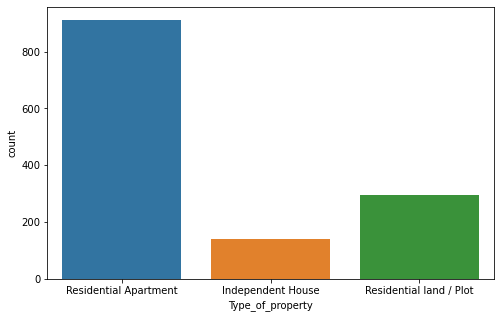

In [10]:
# Ploting a countplot for "Type_of_property"

plt.figure(figsize=(8,5))
sns.countplot(property_df.Type_of_property);

### ~>Insights from "Posted by" whom(Dealer, Builder,Owner)
###### 1.Highest no of properties are posted by____?
* Owner

###### 2.Lowest no of properties are posted by____?
* Builder

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='Posted_By', ylabel='count'>

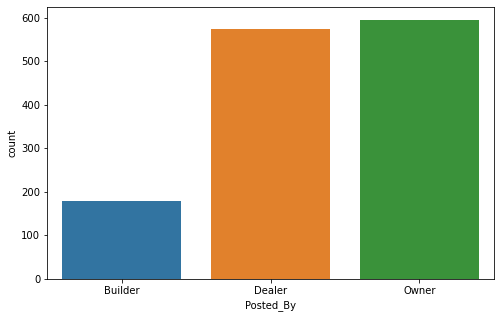

In [11]:
# Ploting a countplot for "Posted_By"

plt.figure(figsize=(8,5))
sns.countplot(property_df.Posted_By)

### ~>Insights from "BHK"
###### 1.Most common BHKs in posted properties?
* 2,3 BHKs are most common

###### 2.Least common BHKs in posted properties?
* 6,7,8,9 are least common

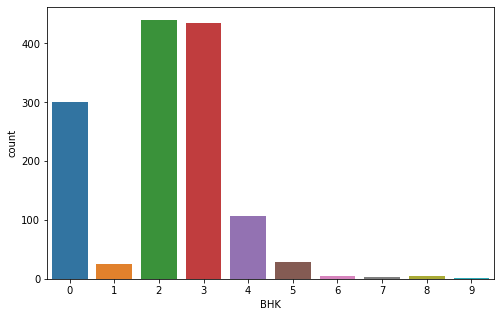

In [12]:
# Ploting a countplot for "BHK"

plt.figure(figsize=(8,5))
sns.countplot(property_df.BHK);

### ~>Insights from "Price in lakhs"
###### 1.what is the Price range of most of the properties posted?
* 0-100L(less than 1Cr)

###### 2.How  many properties are there in that range?
* nearly 1000

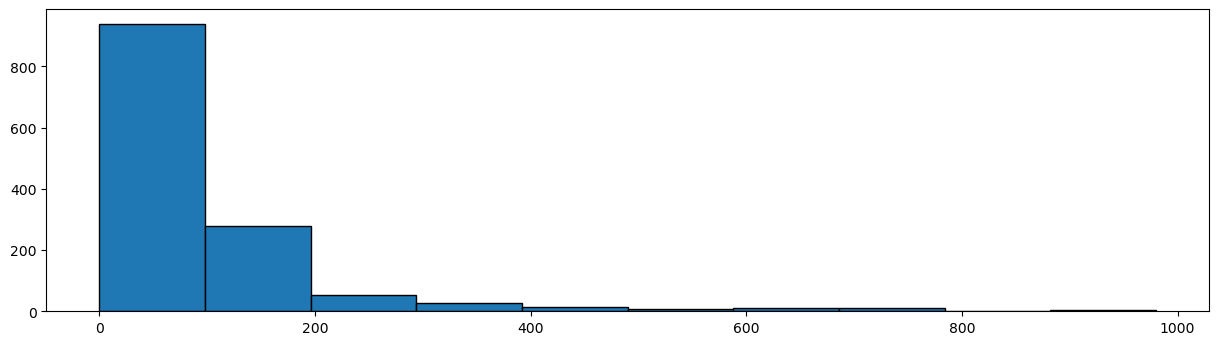

In [13]:
# Ploting a histplot for "Price_in_lakhs"

plt.figure(dpi = 100, figsize=(15,4))
plt.hist(property_df.Price_in_lakhs, edgecolor = 'black',bins=10);

###### 3.what is the Price range of most of the properties posted below 1Cr?
* Between 40-70L

<Figure size 1500x400 with 0 Axes>

(array([106.,  60.,  72.,  78., 122., 113., 119., 107.,  94., 115.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

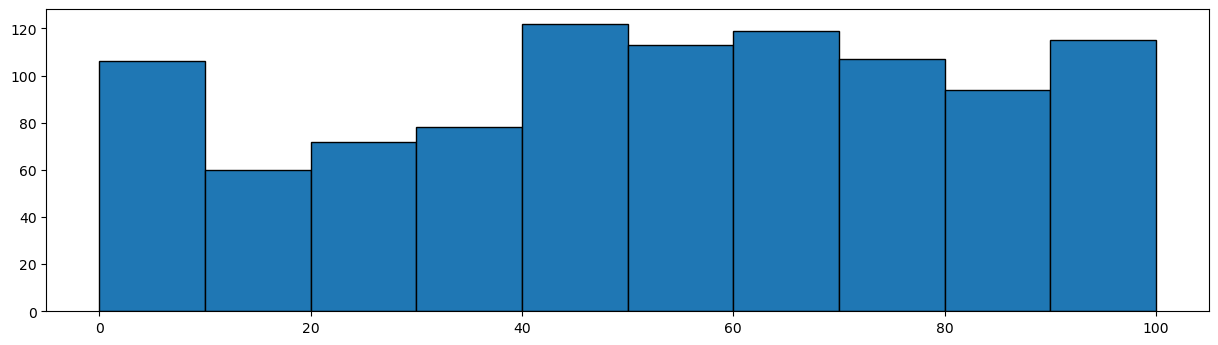

In [14]:
# Price in lakhs with range from 0 to 100 Lac.

plt.figure(dpi = 100, figsize=(15,4))
plt.hist(property_df.Price_in_lakhs, edgecolor = 'black',range=(0,100),bins=10)

### ~>Insights from "Max_Area(sft)"
###### 1.what is the Max area range of most of the properties posted?
* 1000-2000 sft

###### 2.How  many properties are there in that range?
* more than 800

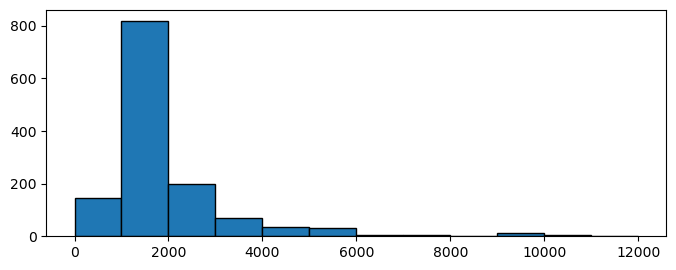

In [15]:
# Ploting a histplot for "Max_Area(sft)" with range 0-12000

plt.figure(dpi = 100, figsize=(8,3))
plt.hist(property_df['Max_Area(sft)'], edgecolor = 'black',range=(0,12000),bins=12);

### ~>Insights from "Max_Area(sft)"
###### 1.what is the Min area range of most of the properties posted?
* 1000-1500 sft

###### 2.How  many properties are there in that range?
* nearly 600

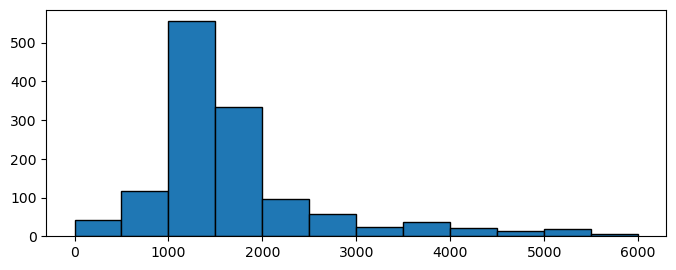

In [16]:
# Ploting a histplot for "Min_Area(sft)" with range 0-6000

plt.figure(dpi = 100, figsize=(8,3))
plt.hist(property_df['Min_Area(sft)'], edgecolor = 'black',range=(0,6000),bins=12);

In [17]:
n=10
freq_places=property_df['Place'].value_counts()[:n].index.tolist()
freq_places

['Gachibowli',
 'Bachupally',
 'Kondapur',
 'Kompally',
 'Narsingi',
 'Chandanagar',
 'Adibatla',
 'Kokapet',
 'Shad nagar',
 'Kollur']

In [18]:
k=property_df['Place'].value_counts().nlargest(10)
a=list(k)

### ~> Insights from "Most frequent Places" pie plot
Gachibowli has maximum number of posts with 18.5% of posts among top 10.

Yadagirigutta has least number of posts with 6.2% of posts among top 10.


<Figure size 720x360 with 0 Axes>

([<matplotlib.patches.Wedge at 0x2273f984eb0>,
 [Text(0.9202905449230987, 0.6025490128820611, 'Gachibowli'),
  Text(-0.09245553344002766, 1.09610764723923, 'Bachupally'),
  Text(-0.885057521340236, 0.6532022534552968, 'Kondapur'),
  Text(-1.0998076779898387, -0.020568700362429106, 'Kompally'),
  Text(-0.897116979268304, -0.6365383928000836, 'Narsingi'),
  Text(-0.43988124922700717, -1.0082184716511038, 'Chandanagar'),
  Text(0.071943425025003, -1.0976448166851023, 'Adibatla'),
  Text(0.5499999925673779, -0.952627948454109, 'Kokapet'),
  Text(0.9030292765677636, -0.628122699527331, 'Shad nagar'),
  Text(1.0788638084435533, -0.21459935421774162, 'Kollur')],
 [Text(0.5019766608671447, 0.3286630979356696, '18.5%'),
  Text(-0.050430290967287815, 0.5978768984941254, '15.8%'),
  Text(-0.482758648003765, 0.3562921382483437, '11.3%'),
  Text(-0.5998950970853665, -0.011219291106779512, '9.5%'),
  Text(-0.4893365341463476, -0.34720275970913644, '9.5%'),
  Text(-0.23993522685109478, -0.54993734817

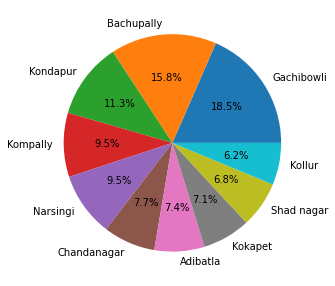

In [19]:
plt.figure(figsize=(10,5))
plt.pie(a,labels=freq_places, autopct='%1.1f%%');
plt.show()

In [20]:
lfreq_places=property_df['Place'].value_counts()
# [-367:].index.tolist()
lfreq_places

Gachibowli               62
Bachupally               53
Kondapur                 38
Kompally                 32
Narsingi                 32
                         ..
Krishna nagar             1
Balaji Nagar              1
kuntloor, hayathnagar     1
Humayunagar               1
Swarnapuri Colony II      1
Name: Place, Length: 521, dtype: int64

In [21]:
k=property_df['Place'].value_counts().nsmallest(368)
k
# a=list(k)

Vivekanand Colony         1
Vyasapuri                 1
Kamsanpally Shadnahar     1
KPHB                      1
bhavani nagar, Nagaram    1
                         ..
Balaji Nagar              1
kuntloor, hayathnagar     1
Humayunagar               1
Swarnapuri Colony II      1
Hafeezpet                 2
Name: Place, Length: 368, dtype: int64

### ~> Insights from "Least frequent Places" pie plot


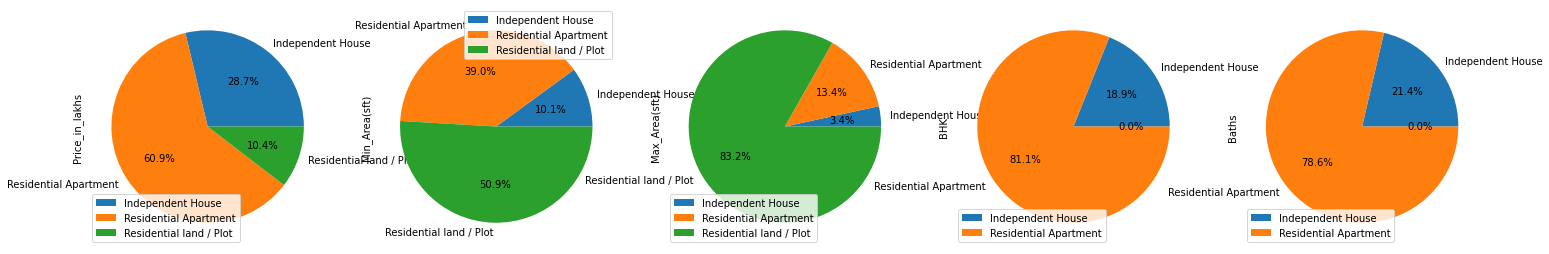

In [22]:
# Pie plot
property_df.groupby(['Type_of_property']).sum().plot(kind='pie',subplots=(3,3),figsize=(25,20), autopct='%1.1f%%');

### BIVARIATE

### ~>Insights from BOXPLOT of "'Price_in_lakhs' & 'Min_Area(sft)'"
######  from the boxplot we can observe that there are many outliers in the data scraped from the website

<AxesSubplot:>

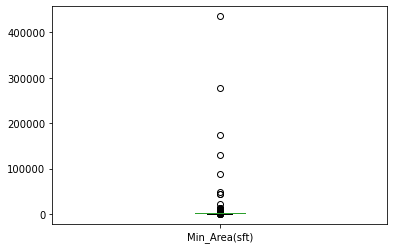

In [23]:
property_df.plot(x='Price_in_lakhs',y='Min_Area(sft)',kind='box')

In [24]:
property_df['Price_in_lakhs'].

SyntaxError: invalid syntax (<ipython-input-24-e7b78eb69f34>, line 1)

<Figure size 360x360 with 0 Axes>

<AxesSubplot:ylabel='Price_in_lakhs'>

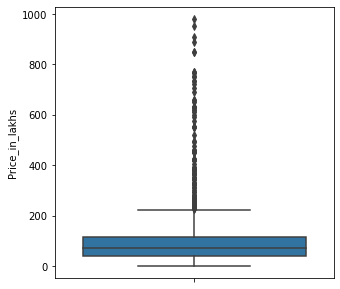

In [25]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Price_in_lakhs',data=property_df)

<AxesSubplot:xlabel='Price_in_lakhs'>

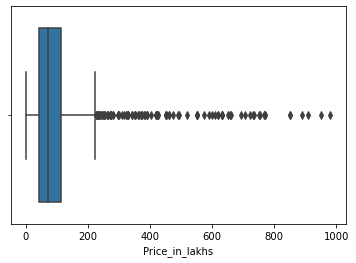

In [26]:
sns.boxplot(property_df.Price_in_lakhs)

### ~>Insights from "Month and Posted By"
###### 1.In which month max no. of the properties are posted(by dealer,builder,owner)?
* July

###### 2.In which month least no. of the properties are posted(by dealer,builder,owner)?
* March

###### 3.In which month Dealer posted more than Owner?
* July, August

###### 4.In which months there are no posts by dealer ?
* March, April

We can observe that in the months of march april and may, there are very few posts. So during these months people should be encouraged to post in the website.

In [27]:
# Extracting Month from Posted_Date
property_df['Month'] = property_df['Posted_Date'].dt.month

In [28]:
property_df['Month'].unique()

array([7, 8, 6, 3, 5, 4], dtype=int64)

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='Month', ylabel='count'>

([<matplotlib.axis.XTick at 0x2273f9f58b0>,
 [Text(0, 0, 'March'),
  Text(1, 0, 'April'),
  Text(2, 0, 'May'),
  Text(3, 0, 'June'),
  Text(4, 0, 'July'),
  Text(5, 0, 'August')])

Text(0.5, 1.0, 'Posts in 2021')

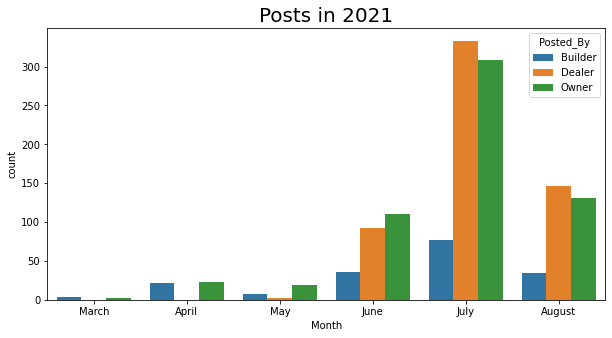

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month',hue='Posted_By',data=property_df);
plt.xticks(ticks=[0,1,2,3,4,5],labels=['March','April','May','June','July','August'])
plt.title('Posts in 2021',fontsize=20)
plt.show()

### ~>Insights from "Month and Type of property"
###### 1.In which month max no. of the properties are posted and which type?
* July has maximum no of residential apartment posts.

###### 2.In which month least no. of the properties are posted?
* March

###### 3.In which month Independent houses are posted more than Residential plots?
* August

###### 4.In which months there are very few posts for Independent house ?
* March, April and May

We can observe that in the months of march april and may, there are very few posts. So during these months people should be encouraged to post in the website.

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Month', ylabel='count'>

([<matplotlib.axis.XTick at 0x2273fa885b0>,
 [Text(0, 0, 'March'),
  Text(1, 0, 'April'),
  Text(2, 0, 'May'),
  Text(3, 0, 'June'),
  Text(4, 0, 'July'),
  Text(5, 0, 'August')])

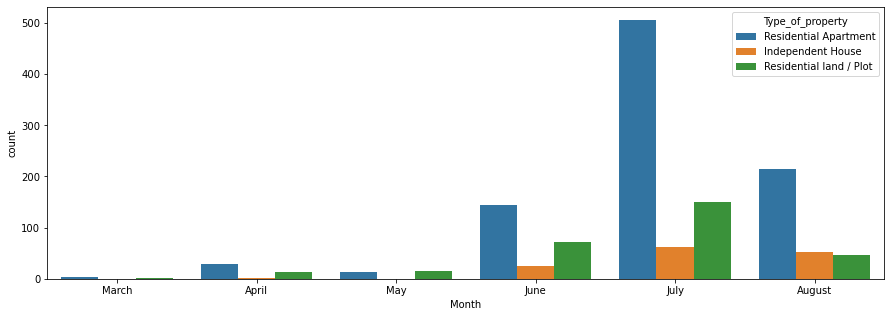

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='Month',hue='Type_of_property',data=property_df);
plt.xticks(ticks=[0,1,2,3,4,5],labels=['March','April','May','June','July','August'])
# plt.title('Posts in 2021',fontsize=20)
plt.show()

### ~>Insights from "Place" and "Price in Lakhs"
We can observe from the bar plot that: 
- Properties in Gandipet are costliest
- In these top 10 place, the prices start from 4 Crs.

<AxesSubplot:xlabel='Place'>

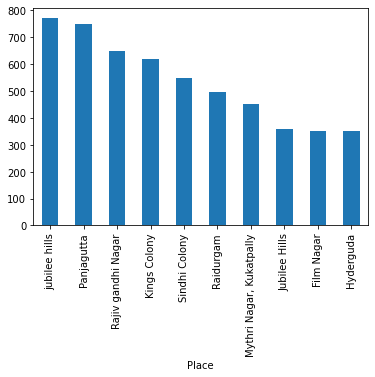

In [31]:
property_df.groupby('Place')['Price_in_lakhs'].mean().nlargest(10).plot.bar()

### ~> Insights from 'Posted by' and 'Price in lakhs'
We can observe from the bar plot that: 
   
- The properties posted by dealers are costlier.
- The properties posted by owners are comparatively cheaper.

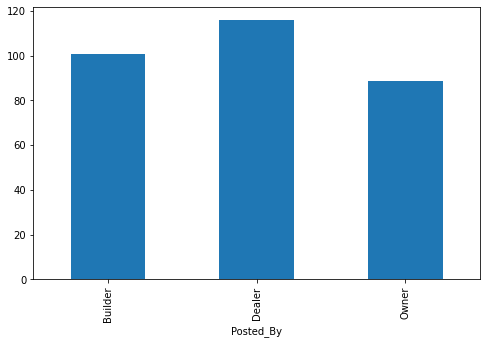

In [32]:
plt.figure(figsize=(8,5))
property_df.groupby(['Posted_By'])['Price_in_lakhs'].mean().plot(kind='bar');

### ~> Insights from 'Type_of_property' and 'Price in lakhs'
We can observe from the bar plot that: 
   
- Independent houses are very costly.
- Residential plots are comparatively cheaper.

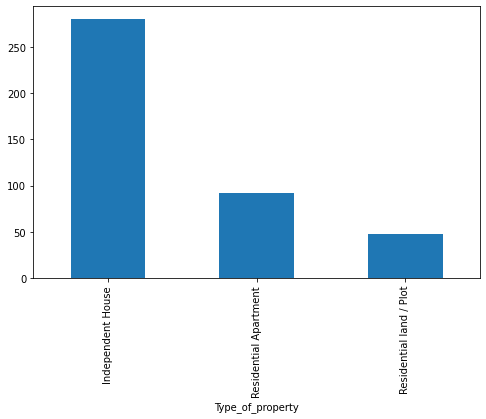

In [33]:
plt.figure(figsize=(8,5))
property_df.groupby(['Type_of_property'])['Price_in_lakhs'].mean().plot(kind='bar');

### ~>Insights from "Type_of_property & Posted By"
###### From the hist plot we can observe that:
- Residential Apartments
1. Maximum number of Residential apartments are posted by Dealers and Owners.
2. Dealers, Owners, Builders posted nearly 400,400,200 properties respectively.
3. Builders posted least no of properties.
- Independent Houses
1. Maximum number of Independent houses are posted by Dealers.
2. Dealers, Owners, Builders posted nearly 100,50,25 properties respectively.
3. Builders posted least no of properties.
- Residential Plots
1. Maximum number of Residential Plots are posted by Dealers.
2. Dealers, Owners, Builders posted nearly 175,125,25 properties respectively.
3. Builders posted least no of properties.

Through this we understand that builders must be encouraged to use the website.

<Figure size 504x504 with 0 Axes>

<AxesSubplot:xlabel='Type_of_property', ylabel='Count'>

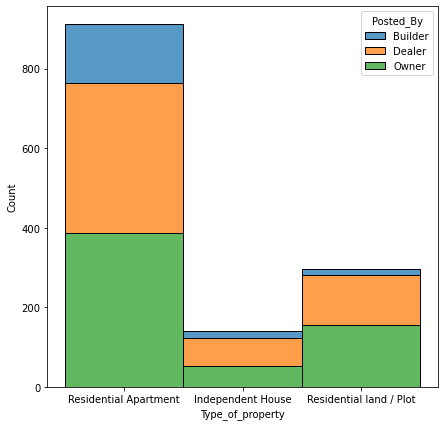

In [34]:
plt.figure(figsize=(7,7))
sns.histplot(x= 'Type_of_property',hue='Posted_By', data= property_df, stat='count',multiple='stack');
plt.show()

### MULTIVARIATE

### ~>Insights from "Type_of_property & BHK & Price_in_lakhs"
###### From the line plot we can observe that:
1. Residential Apartments have 0-7 BHK which are nearly in price range of 30-650L
2. Independent Houses have 0-9 BHK which are nearly in price range of 0-600L
3. Residential land/plots have 0 BHK.

<Figure size 1296x504 with 0 Axes>

<AxesSubplot:xlabel='BHK', ylabel='Price_in_lakhs'>

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

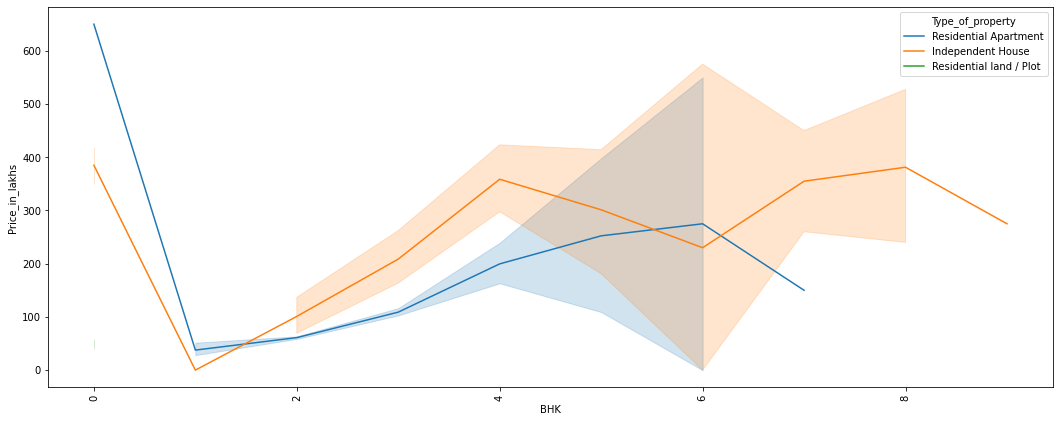

In [35]:
plt.figure(figsize=(18,7))
sns.lineplot(x='BHK',y='Price_in_lakhs',data = property_df,hue = 'Type_of_property')
plt.xticks(rotation = 90)
plt.show()

### ~>Insights from "Price_in_lakhs & BHK & Posted_By"
###### From the line plot we can observe that:
1. Dealer is posting the properties between 0-6 BHK is nearly in price range of 0-550L
2. Builder is posting the properties between 0-5 BHK is nearly in price range of 0-800L
3. Owner is posting the properties between 0-9 BHK is nearly in price range of 0-600L

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='BHK', ylabel='Price_in_lakhs'>

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

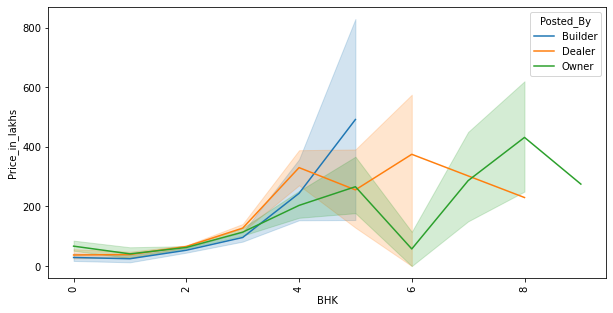

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(x='BHK',y='Price_in_lakhs',data = property_df,hue = 'Posted_By');
plt.xticks(rotation = 90)
plt.show()

#### Pair plot of property_df with Posted by as hue

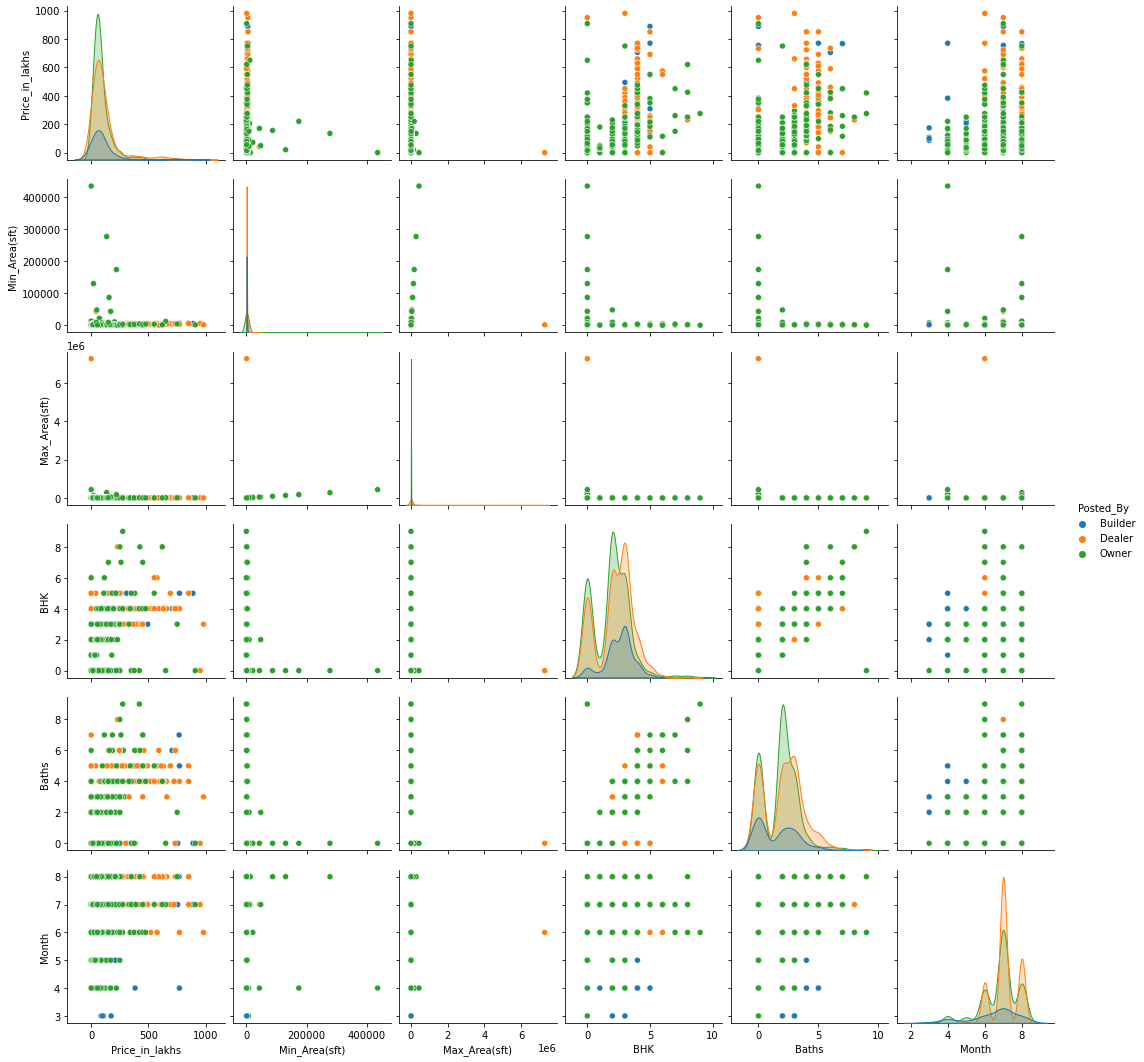

In [37]:
sns.pairplot(property_df,hue="Posted_By")

#### Heatmap of property_df

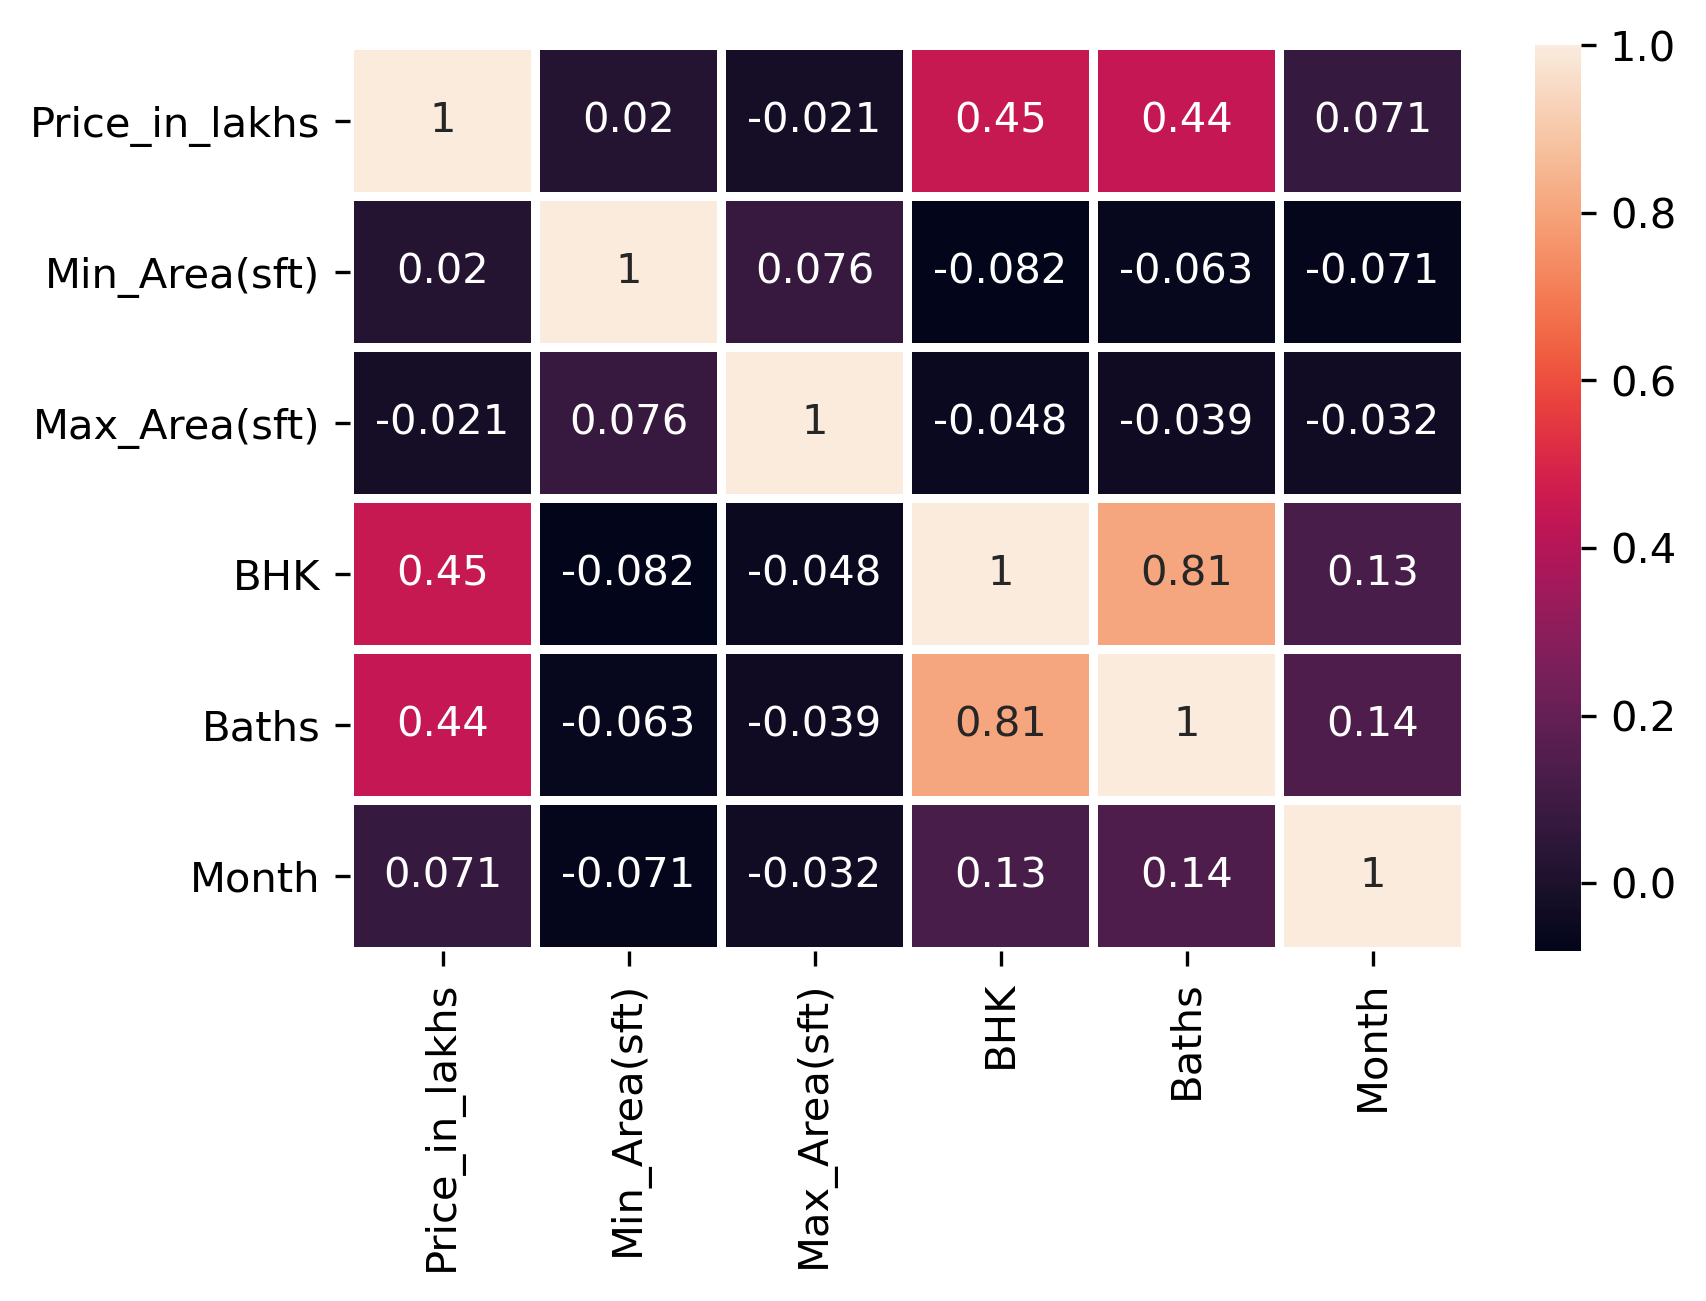

In [38]:
plt.figure(dpi = 300)
sns.heatmap(property_df.corr(),linecolor='white',linewidths=2,annot=True);

### Non Graphical Data Insights

In [39]:
property_df.BHK.value_counts()

2    440
3    434
0    300
4    107
5     29
1     26
6      5
8      4
7      3
9      1
Name: BHK, dtype: int64

In [40]:
# taking 10 most frequent places

property_df['Place'].value_counts().nlargest(10)

Gachibowli     62
Bachupally     53
Kondapur       38
Kompally       32
Narsingi       32
Chandanagar    26
Adibatla       25
Kokapet        24
Shad nagar     23
Kollur         21
Name: Place, dtype: int64

#### Correlation table

In [41]:
property_df.corr()

,Price_in_lakhs,Min_Area(sft),Max_Area(sft),BHK,Baths,Month
Price_in_lakhs,1.000000,0.020457,-0.020853,0.450661,0.440564,0.070968
Min_Area(sft),0.020457,1.000000,0.075887,-0.081705,-0.062945,-0.070533
Max_Area(sft),-0.020853,0.075887,1.000000,-0.048262,-0.039074,-0.032145
BHK,0.450661,-0.081705,-0.048262,1.000000,0.809517,0.125354
Baths,0.440564,-0.062945,-0.039074,0.809517,1.000000,0.140331
Month,0.070968,-0.070533,-0.032145,0.125354,0.140331,1.000000
